In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Read in the data, create column for BTU conversion from flowrates
df = pd.read_csv('testing.csv')
df['BTU'] = df['Flow Rate'] * 2.117 * 1075
df = df.replace({np.nan: 'None'})

In [4]:
# Setting up filtering conditions
burner9k = df['Burner'] == '9.2K'
burner15k = df['Burner'] == '15K'
burner18k = df['Burner'] == '18K'
burner20k = df['Burner'] == '20K'

main = df['Main/Simmer'] == 'M'
simmer = df['Main/Simmer'] == 'S'
high = df['High/Low'] == 'H'
low = df['High/Low'] == 'L'

reg_lf = df['Regulator'] == 'LF'
reg_hf = df['Regulator'] == 'HF'
reg_lf_bp = df['Regulator'] == 'LF-BP'
reg_hf_bp = df['Regulator'] == 'HF-BP'
reg_none = df['Regulator'] == 'None'

orifice_lf = df['Orifices'] == 'LF'
orifice_hf = df['Orifices'] == 'HF'

lowpressure = df['Pressure'] == 5.0
highpressure = df['Pressure'] == 5.4

# Setting up data subsets
mainhigh = df[main & high]
mainlow = df[main & low]
simmerhigh = df[simmer & high]
simmerlow = df[simmer & low]

mainhigh9k = mainhigh[burner9k]
mainhigh15k = mainhigh[burner15k]
mainhigh18k = mainhigh[burner18k]
mainhigh20k = mainhigh[burner20k]

mainlow9k = mainlow[burner9k]
mainlow15k = mainlow[burner15k]
mainlow18k = mainlow[burner18k]
mainlow20k = mainlow[burner20k]

simmerhigh9k = simmerhigh[burner9k]
simmerhigh15k = simmerhigh[burner15k]
simmerhigh18k = simmerhigh[burner18k]
simmerhigh20k = simmerhigh[burner20k]

simmerlow9k = simmerlow[burner9k]
simmerlow15k = simmerlow[burner15k]
simmerlow18k = simmerlow[burner18k]
simmerlow20k = simmerlow[burner20k]

# Current (12/2020) final tester limits for each burner by line
gr9klim = {'mh-lwr':3.799, 'mh-upr':5.027,
           'ml-lwr':None, 'ml-upr':None,
           'sh-lwr':0.605, 'sh-upr':1.157,
           'sl-lwr':None, 'sl-upr':None}

gr15klim = {'mh-lwr':6.193, 'mh-upr':8.062,
            'ml-lwr':None, 'ml-upr':None,
            'sh-lwr':0.997, 'sh-upr':1.719,
            'sl-lwr':None, 'sl-upr':None}

srt9klim = {'mh-lwr':3.875, 'mh-upr':5.418,
            'ml-lwr':0.200, 'ml-upr':0.680,
            'sh-lwr':0.520, 'sh-upr':1.000,
            'sl-lwr':0.100, 'sl-upr':0.600}

srt15klim = {'mh-lwr':6.506, 'mh-upr':8.045,
             'ml-lwr':0.500, 'ml-upr':1.000,
             'sh-lwr':1.000, 'sh-upr':1.600,
             'sl-lwr':0.300, 'sl-upr':0.800}

srt18klim = {'mh-lwr':8.328, 'mh-upr':10.460,
             'ml-lwr':0.500, 'ml-upr':1.000,
             'sh-lwr':1.000, 'sh-upr':1.600,
             'sl-lwr':0.300, 'sl-upr':0.800}

srt20klim = {'mh-lwr':8.031, 'mh-upr':11.621,
             'ml-lwr':0.490, 'ml-upr':1.040,
             'sh-lwr':1.000, 'sh-upr':1.626,
             'sl-lwr':0.300, 'sl-upr':0.820}

# Setting up sample size filters
lplf20k = mainhigh[burner20k & lowpressure & orifice_lf].groupby('Regulator')['Flow Rate'].count()
lplf18k = mainhigh[burner18k & lowpressure & orifice_lf].groupby('Regulator')['Flow Rate'].count()
lplf15k = mainhigh[burner15k & lowpressure & orifice_lf].groupby('Regulator')['Flow Rate'].count()
lplf9k = mainhigh[burner9k & lowpressure & orifice_lf].groupby('Regulator')['Flow Rate'].count()

hphf20k = mainhigh[burner20k & highpressure & orifice_hf].groupby('Regulator')['Flow Rate'].count()
hphf18k = mainhigh[burner18k & highpressure & orifice_hf].groupby('Regulator')['Flow Rate'].count()
hphf15k = mainhigh[burner15k & highpressure & orifice_hf].groupby('Regulator')['Flow Rate'].count()
hphf9k = mainhigh[burner9k & highpressure & orifice_hf].groupby('Regulator')['Flow Rate'].count()

# Low Pressure + Low Flow Orifices vs. High Pressure + High Flow Orifices


#### Note that because the data used to generate these figures has been filtered several times, sample size is small. Will need to collect more data before these figures can reliably predict flow patterns.

- Sample size for each legend entry listed in parantheses.

    - If there are two values, the first corresponds to the low pressure figure and the second corresponds to the high pressure figure.


- Current tester limits shown as green dotted lines.

**Regulator key**

None: Regulator removed from system

HF-BP: High-presure regulator, bypassed

LF-BP: Low-pressure regulator, bypassed

LF/HF: Low-pressure on the left side, high-pressure on the right side

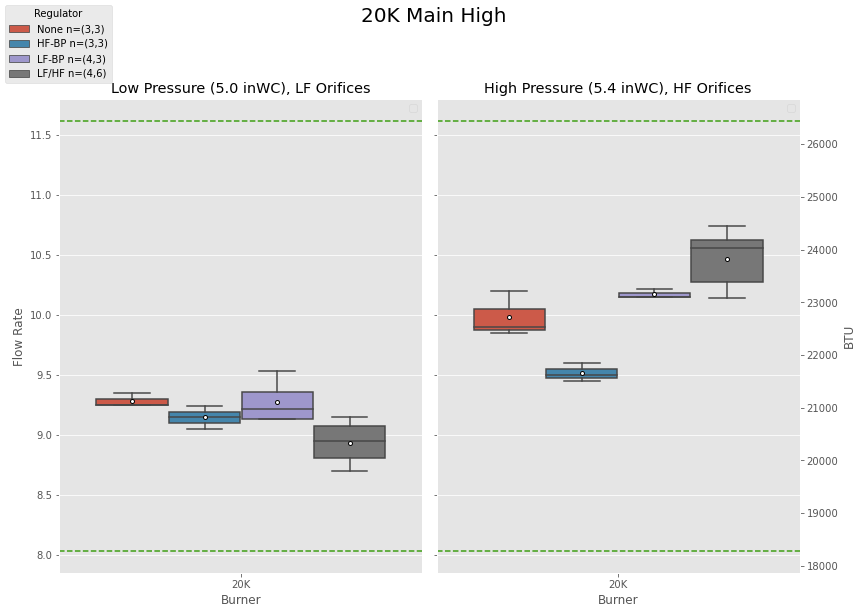

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('20K Main High', y=1.06, fontsize=20)

#Plots
sns.boxplot(ax=axes[0], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
#sns.swarmplot(x=mainhigh[burner20k]['Burner'], y='Flow Rate', data=mainhigh[lowpressure & orifice_lf], color="grey", ax=axes[0], hue='Regulator')
#sns.swarmplot(x=mainhigh[burner20k]['Burner'], y='Flow Rate', data=mainhigh[highpressure & orifice_hf], color="grey", ax=axes[1], hue='Regulator')

# Adding sample size to legend callouts
labels[0] = 'None n=('+str(lplf20k['None'])+','+str(hphf20k['None'])+')'
labels[1] = 'HF-BP n=('+str(lplf20k['HF-BP'])+','+str(hphf20k['HF-BP'])+')'
labels[2] = 'LF-BP n=('+str(lplf20k['LF-BP'])+','+str(hphf20k['LF-BP'])+')'
labels[3] = 'LF/HF n=('+str(lplf20k['LF'])+','+str(hphf20k['HF'])+')'

# Hide legends for individual plots, will have one global legend
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])

# Set plot titles
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

# Adding lines for tester limits
axes[0].axhline(y=srt20klim['mh-lwr'], ls='--', c='#3c9e12', label='Tester Limit')
axes[0].axhline(y=srt20klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt20klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt20klim['mh-upr'], ls='--', c='#3c9e12')

# Setting legend for entire figure
fig.legend(lines, labels, loc='upper left', title='Regulator')

# Adding secondary axis with BTU conversion
def slpm2btu(x):
    return x * 2.117 * 1075


def btu2slpm(x):
    return x / 2.117 / 1075

secax = axes[1].secondary_yaxis('right', functions=(slpm2btu, btu2slpm))
secax.set_ylabel('BTU')

axes[0].set_ylabel('Flow Rate')
axes[1].set_ylabel('')

#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.tight_layout()
plt.show()

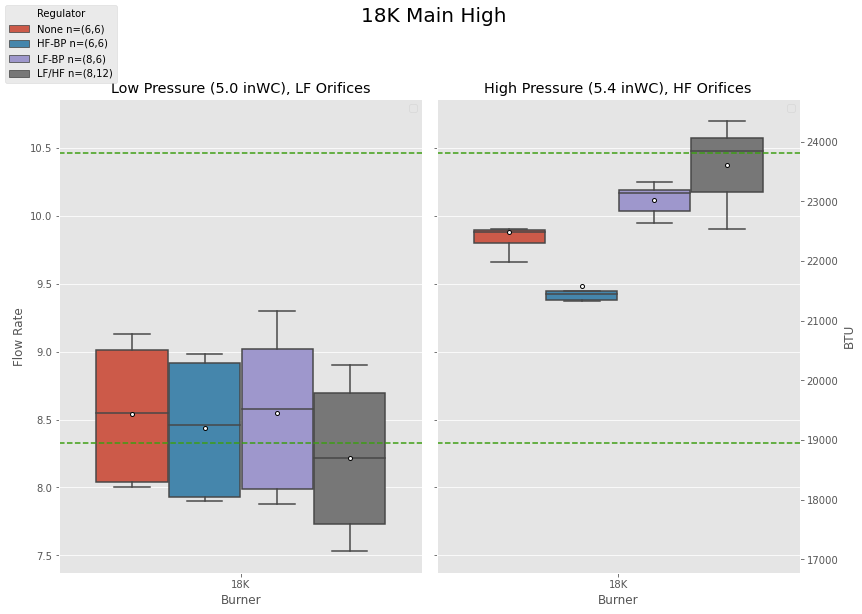

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('18K Main High', y=1.06, fontsize=20)
#Plots
sns.boxplot(ax=axes[0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()

# Adding sample size to legend callouts
labels[0] = 'None n=('+str(lplf18k['None'])+','+str(hphf18k['None'])+')'
labels[1] = 'HF-BP n=('+str(lplf18k['HF-BP'])+','+str(hphf18k['HF-BP'])+')'
labels[2] = 'LF-BP n=('+str(lplf18k['LF-BP'])+','+str(hphf18k['LF-BP'])+')'
labels[3] = 'LF/HF n=('+str(lplf18k['LF'])+','+str(hphf18k['HF'])+')'

# Hide legends for individual plots, will have one global legend
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])

# Set plot titles
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

# Adding lines for tester limits
axes[0].axhline(y=srt18klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt18klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt18klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt18klim['mh-upr'], ls='--', c='#3c9e12')

# Setting legend for entire figure
fig.legend(lines, labels, loc='upper left', title='Regulator')

# Adding secondary axis with BTU conversion
def slpm2btu(x):
    return x * 2.117 * 1075


def btu2slpm(x):
    return x / 2.117 / 1075

secax = axes[1].secondary_yaxis('right', functions=(slpm2btu, btu2slpm))
secax.set_ylabel('BTU')

axes[0].set_ylabel('Flow Rate')
axes[1].set_ylabel('')

plt.tight_layout()
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.show()

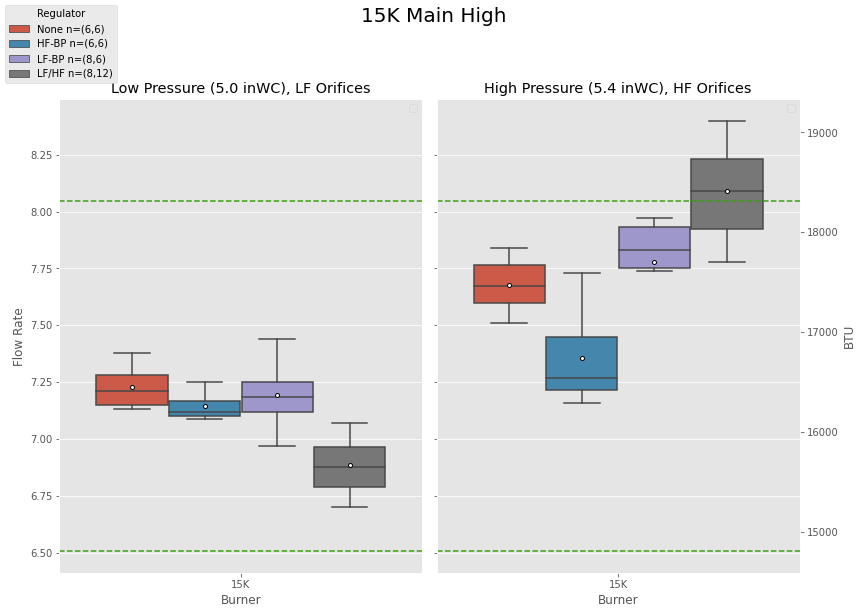

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('15K Main High', y=1.06, fontsize=20)

# Plots
sns.boxplot(ax=axes[0], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()

# Adding sample size to legend callouts
labels[0] = 'None n=('+str(lplf15k['None'])+','+str(hphf15k['None'])+')'
labels[1] = 'HF-BP n=('+str(lplf15k['HF-BP'])+','+str(hphf15k['HF-BP'])+')'
labels[2] = 'LF-BP n=('+str(lplf15k['LF-BP'])+','+str(hphf15k['LF-BP'])+')'
labels[3] = 'LF/HF n=('+str(lplf15k['LF'])+','+str(hphf15k['HF'])+')'

# Hide legends for individual plots, will have one global legend
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])

# Set plot titles
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

# Adding lines for tester limits
axes[0].axhline(y=srt15klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt15klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt15klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt15klim['mh-upr'], ls='--', c='#3c9e12')

# Setting legend for entire figure
fig.legend(lines, labels, loc='upper left', title='Regulator')

# Adding secondary axis with BTU conversion
def slpm2btu(x):
    return x * 2.117 * 1075


def btu2slpm(x):
    return x / 2.117 / 1075

secax = axes[1].secondary_yaxis('right', functions=(slpm2btu, btu2slpm))
secax.set_ylabel('BTU')

axes[0].set_ylabel('Flow Rate')
axes[1].set_ylabel('')

plt.tight_layout()
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.show()

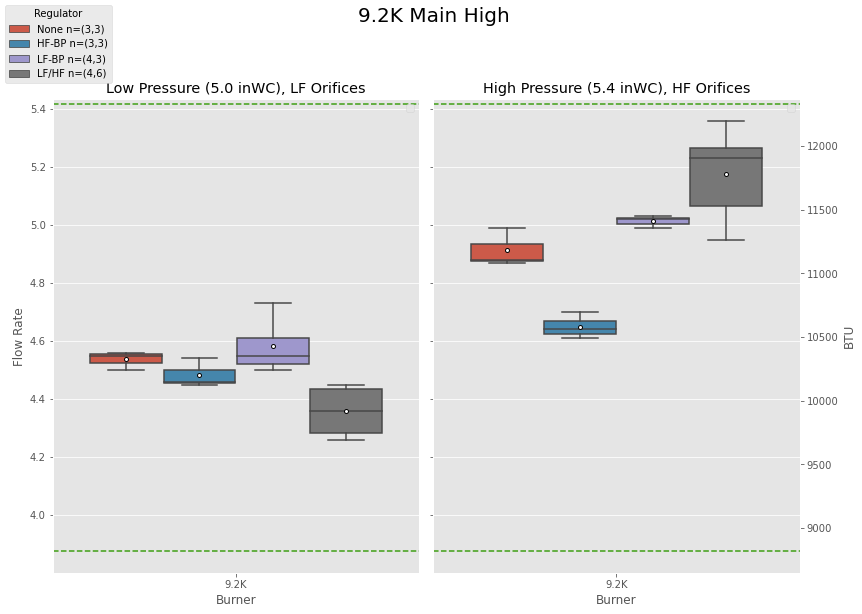

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey=True)
fig.suptitle('9.2K Main High', y=1.06, fontsize=20)

# Plots
sns.boxplot(ax=axes[0], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure & orifice_lf], 
            hue = 'Regulator', 
            hue_order = ['None','HF-BP','LF-BP', 'LF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})
sns.boxplot(ax=axes[1], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure & orifice_hf], 
            hue = 'Regulator',
            hue_order = ['None','HF-BP','LF-BP', 'HF'],
            showfliers=False,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"4"})

lines, labels = fig.axes[-1].get_legend_handles_labels()

# Adding sample size to legend callouts
labels[0] = 'None n=('+str(lplf9k['None'])+','+str(hphf9k['None'])+')'
labels[1] = 'HF-BP n=('+str(lplf9k['HF-BP'])+','+str(hphf9k['HF-BP'])+')'
labels[2] = 'LF-BP n=('+str(lplf9k['LF-BP'])+','+str(hphf9k['LF-BP'])+')'
labels[3] = 'LF/HF n=('+str(lplf9k['LF'])+','+str(hphf9k['HF'])+')'

# Hide legends for individual plots, will have one global legend
axes[0].legend(lines[:0], labels[:0])
axes[1].legend(lines[:0], labels[:0])

# Set plot titles
axes[0].set_title('Low Pressure (5.0 inWC), LF Orifices')
axes[1].set_title('High Pressure (5.4 inWC), HF Orifices')

# Adding lines for tester limits
axes[0].axhline(y=srt9klim['mh-lwr'], ls='--', c='#3c9e12')
axes[0].axhline(y=srt9klim['mh-upr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt9klim['mh-lwr'], ls='--', c='#3c9e12')
axes[1].axhline(y=srt9klim['mh-upr'], ls='--', c='#3c9e12')

# Adding secondary axis with BTU conversion
def slpm2btu(x):
    return x * 2.117 * 1075


def btu2slpm(x):
    return x / 2.117 / 1075

secax = axes[1].secondary_yaxis('right', functions=(slpm2btu, btu2slpm))
secax.set_ylabel('BTU')

axes[0].set_ylabel('Flow Rate')
axes[1].set_ylabel('')

# Setting legend for entire figure
fig.legend(lines, labels, loc='upper left', title='Regulator')
plt.tight_layout()
#plt.savefig('plot-20k-pressurecomparison-regulator.png')
plt.show()

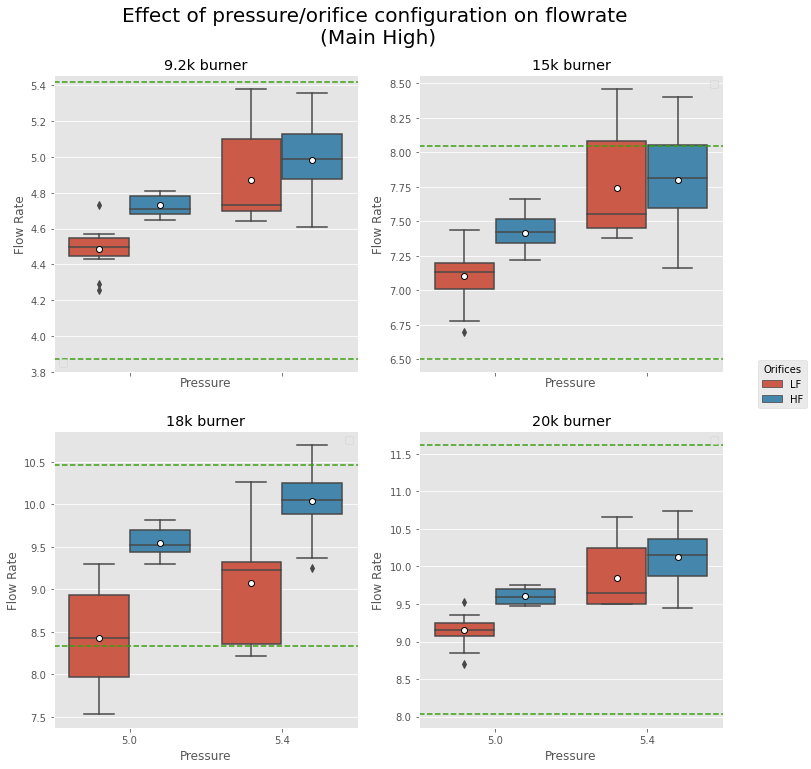

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12,12), sharex='col')
fig.suptitle('Effect of pressure/orifice configuration on flowrate \n'+'(Main High)', y=.96, fontsize=20)


# Plots
sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Pressure'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Pressure'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Pressure'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Pressure'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()

# Hiding individual legends
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

# Setting plot titles
axes[0,0].set_title('9.2k burner')
axes[0,1].set_title('15k burner')
axes[1,0].set_title('18k burner')
axes[1,1].set_title('20k burner')

# Adding lines for tester limits
axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

# Set global legend
fig.legend(lines, labels, loc = 'center right', title='Orifices')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()

In [10]:
def boxplotburnergrid(df, col=None, title=''):
    """Generates a 4x4 boxplot of flow rates by burner with a hue

    Args:
        df (dataframe): the dataframe to use
        col (str): the column name to set as hue
        title (str): main high, main low, simmer high, simmer low

    """
    fig, axes = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle('Effect of ' + col + ' configuration on flow rate by burner\n' + '(' + title + ')', y=.94, fontsize=20)

    sns.boxplot(ax=axes[0,0], 
                x = df[burner9k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"6" })
    sns.boxplot(ax=axes[0,1], 
                x = df[burner15k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"6" })
    sns.boxplot(ax=axes[1,0], 
                x = df[burner18k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"6" })
    sns.boxplot(ax=axes[1,1], 
                x = df[burner20k]['Burner'], y = 'Flow Rate', data = df, hue = col,
                showmeans=True,
                meanprops={ "marker":"o",
                            "markerfacecolor":"white",
                            "markeredgecolor":"black",
                            "markersize":"6" })

    lines, labels = fig.axes[-1].get_legend_handles_labels()
    axes[0,0].legend(lines[:0], labels[:0])
    axes[0,1].legend(lines[:0], labels[:0])
    axes[1,0].legend(lines[:0], labels[:0])
    axes[1,1].legend(lines[:0], labels[:0])

    axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12')
    axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12')
    axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12')
    axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12')
    axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12')
    axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12')
    axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12')
    axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12')

    fig.legend(lines, labels, loc = 'center right')

    #plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

    plt.show()

## Boxplot grids
 These plots break out flow rates for each burner and separate them based on regulator configuration. Each individual boxplot will have flow values taken at high and low pressure, as well as high and low orifice configurations.

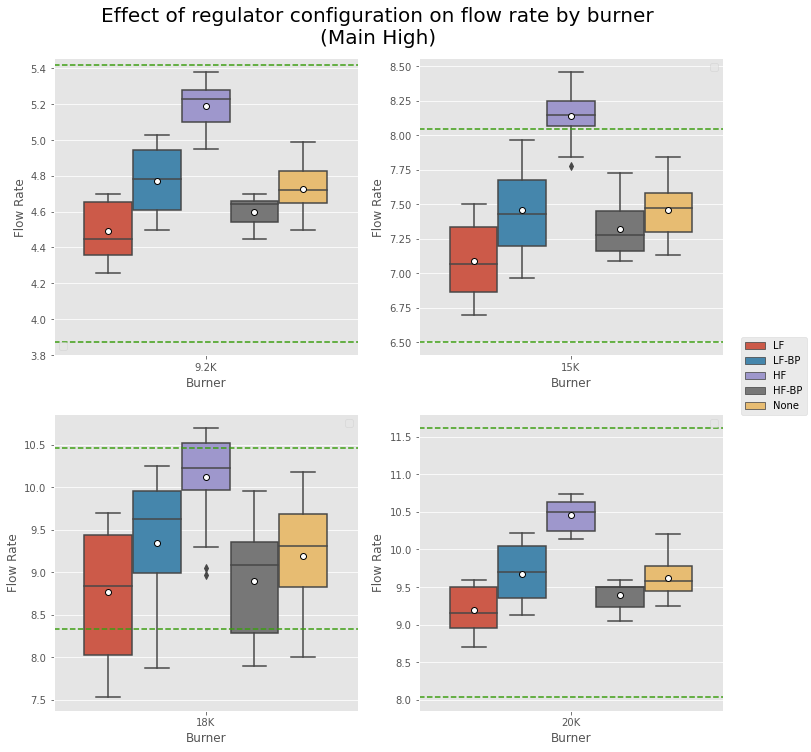

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()

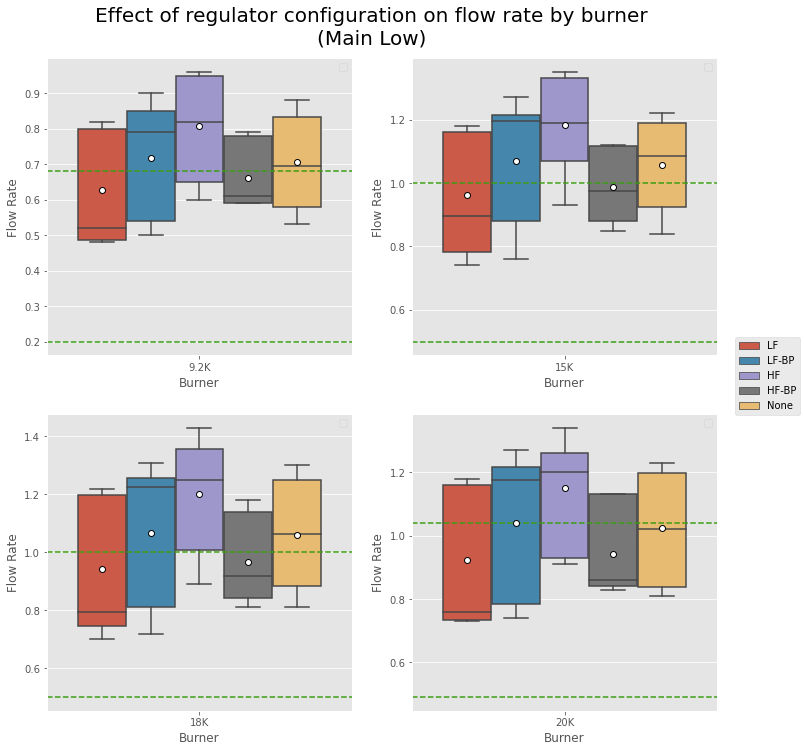

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainlow[burner9k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = mainlow[burner15k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = mainlow[burner18k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = mainlow[burner20k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['ml-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()


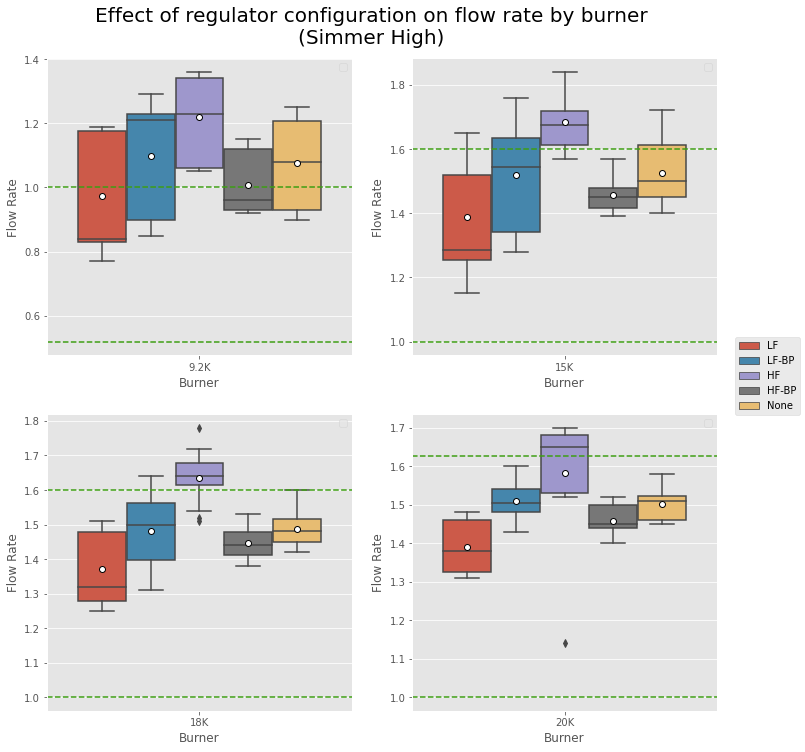

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Simmer High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerhigh[burner9k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = simmerhigh[burner15k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = simmerhigh[burner18k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = simmerhigh[burner20k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()


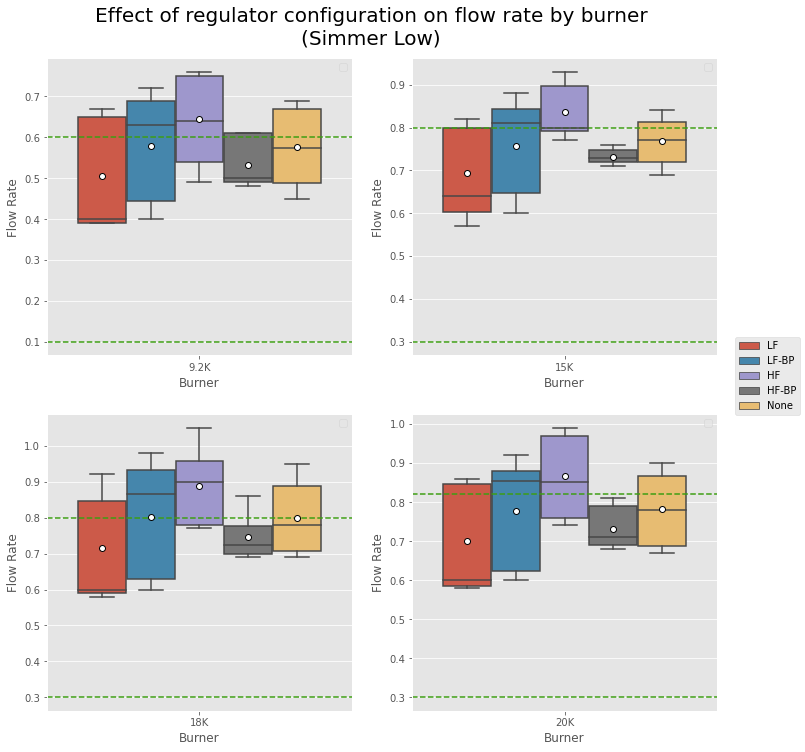

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Simmer Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerlow[burner9k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = simmerlow[burner15k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = simmerlow[burner18k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = simmerlow[burner20k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Regulator',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sl-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()



#### These plots break out flow rates for each burner, separated based on orifice configuration. Each boxplot will have flow rate data from all possible regulator and pressure configurations.

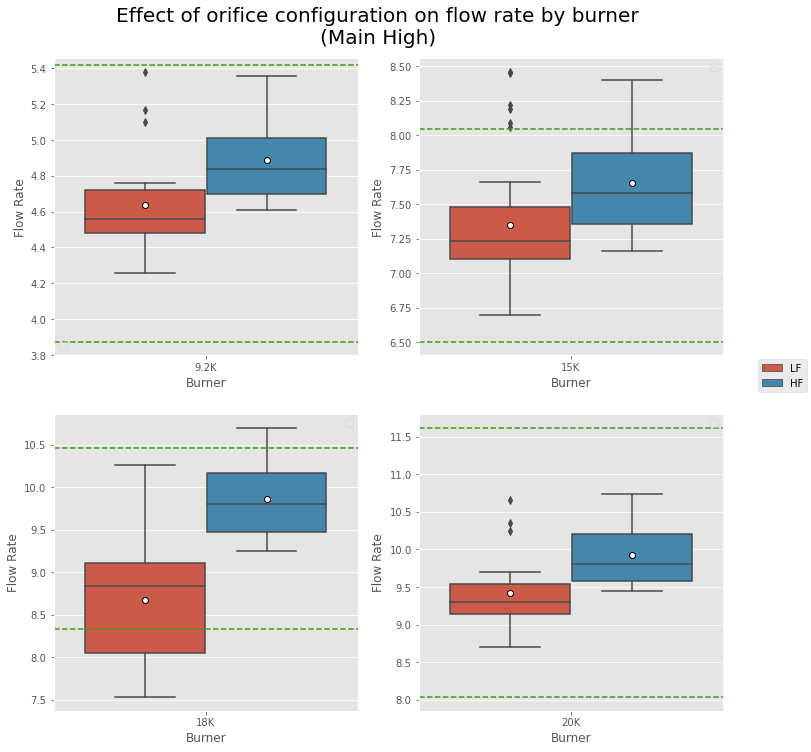

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Main High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], y = 'Flow Rate', data = mainhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()



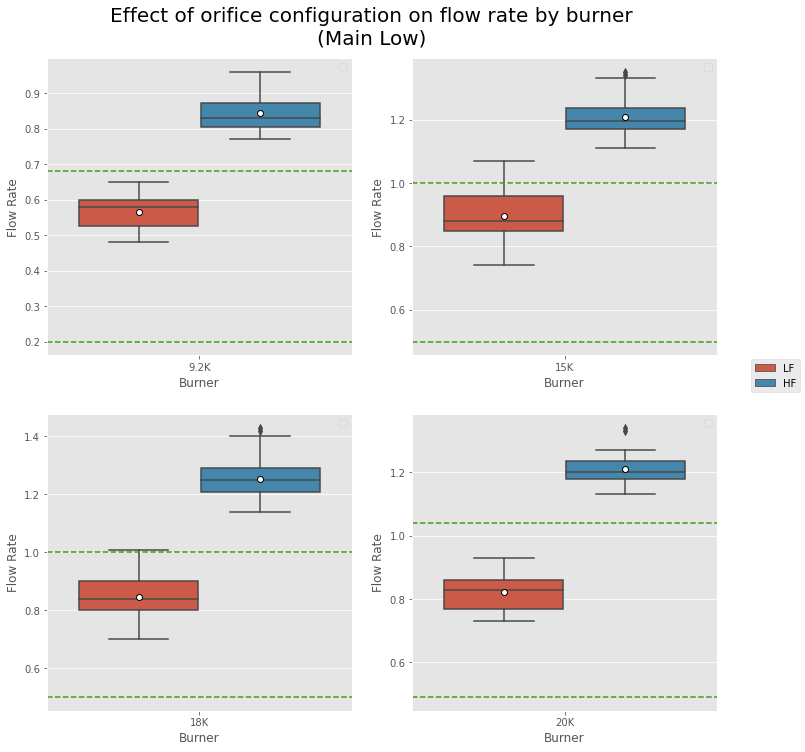

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Main Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainlow[burner9k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = mainlow[burner15k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = mainlow[burner18k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = mainlow[burner20k]['Burner'], y = 'Flow Rate', data = mainlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['ml-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['ml-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['ml-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()




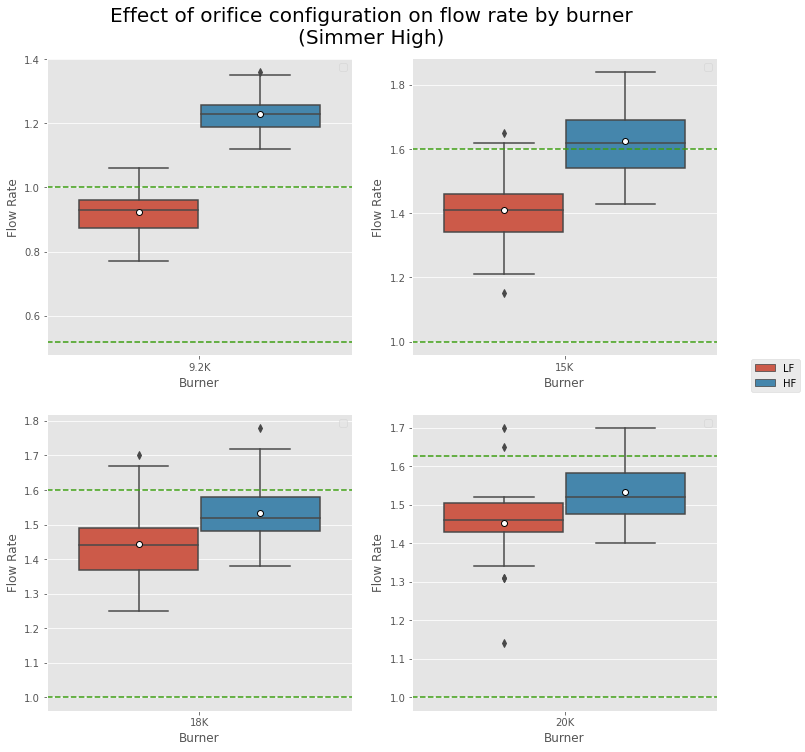

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Simmer High)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerhigh[burner9k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = simmerhigh[burner15k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = simmerhigh[burner18k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = simmerhigh[burner20k]['Burner'], y = 'Flow Rate', data = simmerhigh, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()



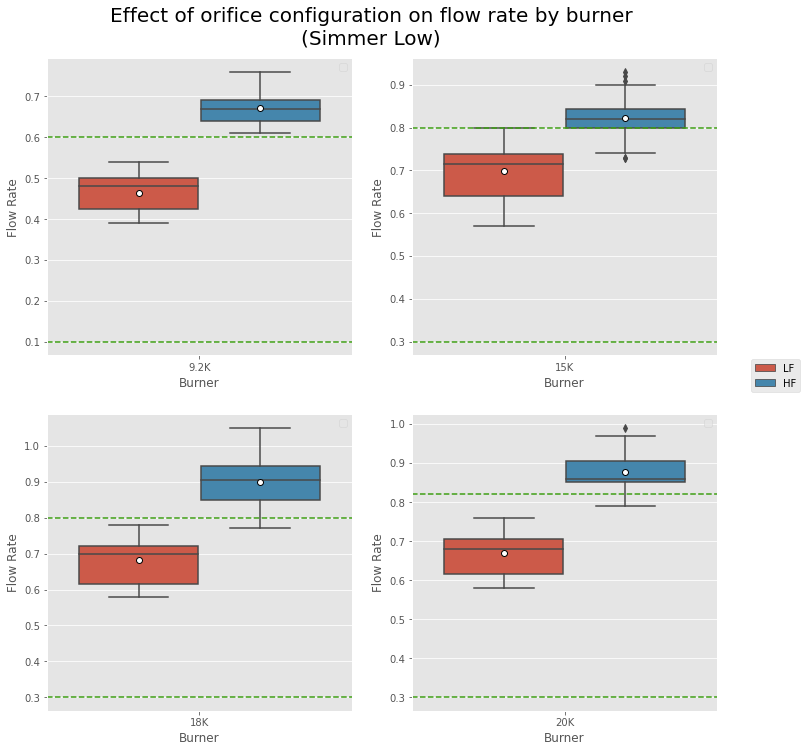

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of orifice configuration on flow rate by burner\n' + '(Simmer Low)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = simmerlow[burner9k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[0,1], 
            x = simmerlow[burner15k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,0], 
            x = simmerlow[burner18k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })
sns.boxplot(ax=axes[1,1], 
            x = simmerlow[burner20k]['Burner'], y = 'Flow Rate', data = simmerlow, hue = 'Orifices',
            showmeans=True,
            meanprops={ "marker":"o",
                        "markerfacecolor":"white",
                        "markeredgecolor":"black",
                        "markersize":"6" })

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['sl-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['sl-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['sl-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-' + col + '-' + title + '.png') # comment this line out if you don't want to save a local copy of the figure

plt.show()




### Controlling for pressure

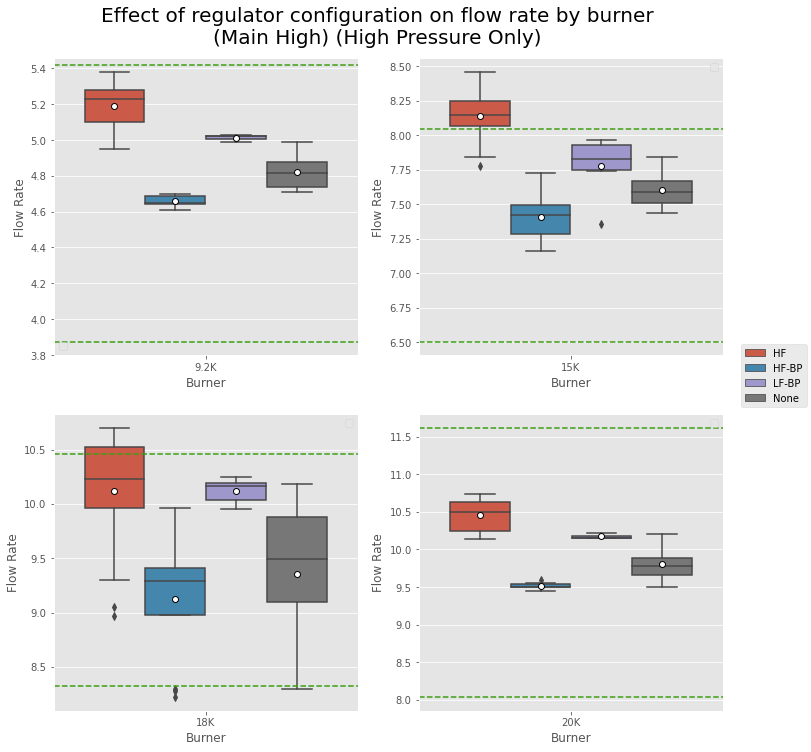

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main High) (High Pressure Only)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[highpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-burner-highpressure-regulator.png')
plt.show()

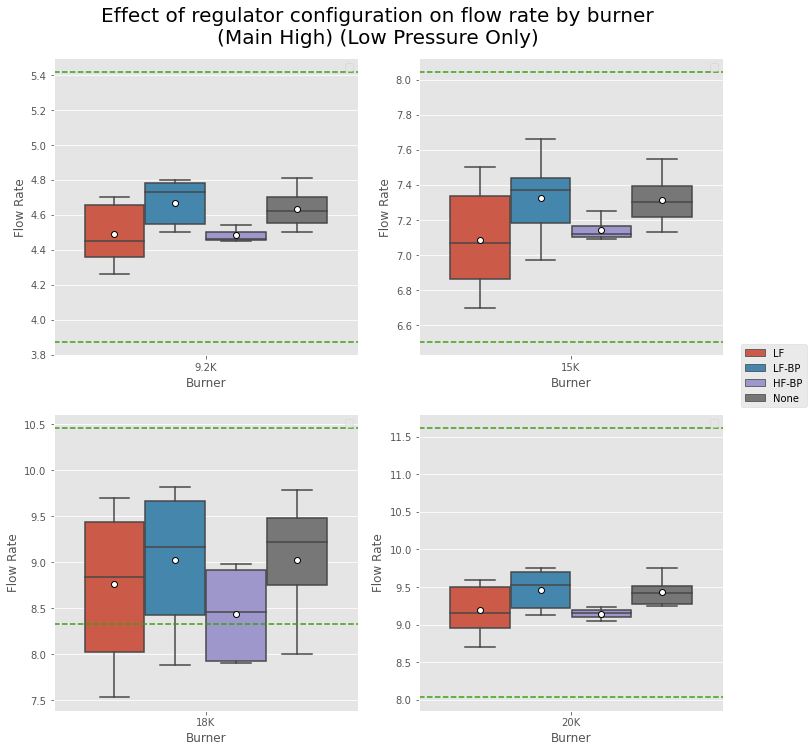

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
fig.suptitle('Effect of regulator configuration on flow rate by burner\n' + '(Main High) (Low Pressure Only)', y=.94, fontsize=20)

sns.boxplot(ax=axes[0,0], 
            x = mainhigh[burner9k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})
sns.boxplot(ax=axes[0,1], 
            x = mainhigh[burner15k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})
sns.boxplot(ax=axes[1,0], 
            x = mainhigh[burner18k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})
sns.boxplot(ax=axes[1,1], 
            x = mainhigh[burner20k]['Burner'], 
            y = 'Flow Rate', 
            data = mainhigh[lowpressure], 
            hue = 'Regulator',
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"6"})

lines, labels = fig.axes[-1].get_legend_handles_labels()
axes[0,0].legend(lines[:0], labels[:0])
axes[0,1].legend(lines[:0], labels[:0])
axes[1,0].legend(lines[:0], labels[:0])
axes[1,1].legend(lines[:0], labels[:0])

axes[0,0].axhline(y=srt9klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,0].axhline(y=srt9klim['mh-upr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-lwr'], c='#3c9e12', ls='--')
axes[0,1].axhline(y=srt15klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,0].axhline(y=srt18klim['mh-upr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-lwr'], c='#3c9e12', ls='--')
axes[1,1].axhline(y=srt20klim['mh-upr'], c='#3c9e12', ls='--')

fig.legend(lines, labels, loc = 'center right')

#plt.savefig('plot-burner-lowpressure-regulator.png')
plt.show()